# Lab 05: Explore data visually

## Challenge 0: Make a figure for Lab Report 1

Now we have explored our own data a little bit, and you have seen lots of examples of different kinds of plots that can be made. Now try to make the plot that best tells the story of these data.

In [ ]:
# Start by importing the data...

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

####
import ssl 

ssl._create_default_https_context = ssl._create_unverified_context
####

file = 'https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/Experiments/LexicalDecision/LexicalDecision_1/data/Lab_report_01.csv'
rawdata = pd.read_csv(file)



In [5]:
# first step?
rawdata = rawdata[(rawdata['block'] == 'trial')]

df_means = rawdata.groupby(['jatosStudyResultId', 'category', 'number_letters']).mean() 
df_means.reset_index(inplace = True)

#df_means.head(50)
df_means.columns

Index(['jatosStudyResultId', 'category', 'number_letters', 'acc', 'accuracy',
       'avg_rt', 'correct', 'experiment_debug', 'experiment_parameters',
       'experiment_pilot', 'experiment_taskname', 'experiment_taskversion',
       'queryParams_batchId', 'queryParams_generalMultiple',
       'queryParams_personalMultipleWorkerId', 'response_time',
       'screen_availableHeight', 'screen_availableWidth', 'screen_colorDepth',
       'screen_height', 'screen_pixelDepth', 'screen_screenX',
       'screen_screenY', 'screen_width', 'subject_nr'],
      dtype='object')

In [8]:
df = df_means[['jatosStudyResultId', 'category', 'number_letters', 'accuracy', 'response_time']]

df.head(5)

len(df['jatosStudyResultId'].unique())

18

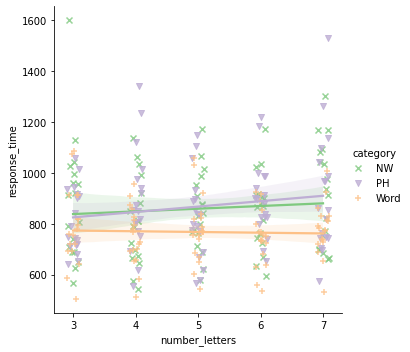

In [27]:
ax = sns.lmplot(data = df, x = 'number_letters', y = 'response_time', hue = 'category', palette = 'Accent',
               markers = ['x', 'v', '+'], x_jitter = 0.1)


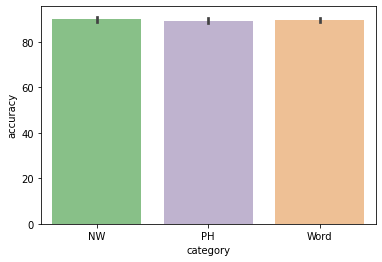

In [32]:
ax = sns.barplot(data = df, x = 'category', y = 'response_time', palette = 'Accent')
# ax1 = sns.barplot(data = df, x = 'category', y = 'accuracy', palette = 'Accent')

In [51]:
df.loc[(df['jatosStudyResultId'] == 693)].mean()

means_id = rawdata.groupby(['jatosStudyResultId']).mean()
means_id[['response_time', 'accuracy']].head(20)

/var/folders/dr/h0gdz53n5gvc69l85jr0mdcc0000gn/T/ipykernel_2106/286747306.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[(df['jatosStudyResultId'] == 693)].mean()


,response_time,accuracy
jatosStudyResultId,,
693,611.168367,86.647959
694,748.811224,92.229592
695,733.688776,90.862245
696,695.403061,96.005102
697,842.943878,93.183673
699,1062.765306,91.510204
701,911.132653,90.688776
702,803.653061,86.642857
703,899.357143,89.918367


In [50]:
df.loc[(df['jatosStudyResultId'] == 704)].mean()



jatosStudyResultId    NaN
category              NaN
number_letters        NaN
accuracy              NaN
response_time         NaN
dtype: object

## Challenge 1: Explore the MEGALEX data

Take a look at the megalex data (described in Ferrand et al, 2010, available in the course site on Brightspace), which tests native French speakers, and compare their results to ours. 

1. Are they similar or different? 
2. What could account for any differences?
3. Make a plot (or plots) illustrating any simiarities or differences you want to highlight.


#### References

Ferrand, L., New, B., Brysbaert, M., Keuleers, E., Bonin, P., Méot, A., ... & Pallier, C. (2010). The French Lexicon Project: Lexical decision data for 38,840 French words and 38,840 pseudowords. Behavior research methods, 42(2), 488-496.

In [16]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn' # I found I needed this to get rid of an annoying warning message

rawdata_mega = pd.read_csv('https://raw.githubusercontent.com/ethanweed/datasets-for-teaching/main/MEGALEX.csv')
rawdata_mega.head()

,item,n_trials,err,rt,sd,rtz,n_used,c_freq_movies,lc_freq_movies,c_freq_books,lc_freq_books,n_letters,n_syllables
0,abaissa,25,0.04,721.833333,106.416191,-0.035017,24,0.00,#NAME?,2.64,0.421603927,7,3
1,abaissait,25,0.08,836.782609,257.778086,0.366517,23,0.02,-1.698970004,2.50,0.397940009,9,3
2,abaissant,26,0.00,773.840000,224.378713,0.254392,25,0.04,-1.397940009,2.77,0.442479769,9,3
3,abaisse,25,0.04,698.826087,246.667913,-0.216788,23,1.30,0.113943352,3.45,0.537819095,7,2
4,abaissé,25,0.00,656.782609,177.024897,-0.434544,23,0.77,-0.113509275,1.55,0.190331698,7,3


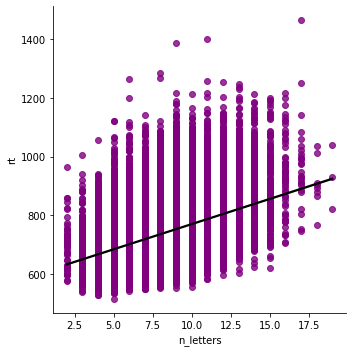

In [37]:
ax1 = sns.lmplot(data = rawdata_mega, x = 'n_letters', y = 'rt', 
                 scatter_kws= {'color': 'purple'}, line_kws={'color': 'black'})

